In [1]:
import os
import glob
import pandas as pd
import librosa
import librosa.display
import IPython.display as ipd
from tqdm import notebook as tq
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['figure.dpi'] = 150

In [2]:
#lst = glob.glob("Y:/fma_full/000*.mp3") C:\Users\cri98\Downloads\fma_large
lst = glob.glob("C:/Users/cri98/Downloads/fma_large/0*.mp3")

len(lst)

66871

In [ ]:
y, sr = librosa.load(lst[0], sr=8000, mono=True, duration=60)
mel_data = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=1024, hop_length=512, n_mels= 128)

In [ ]:
mel_data.shape

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

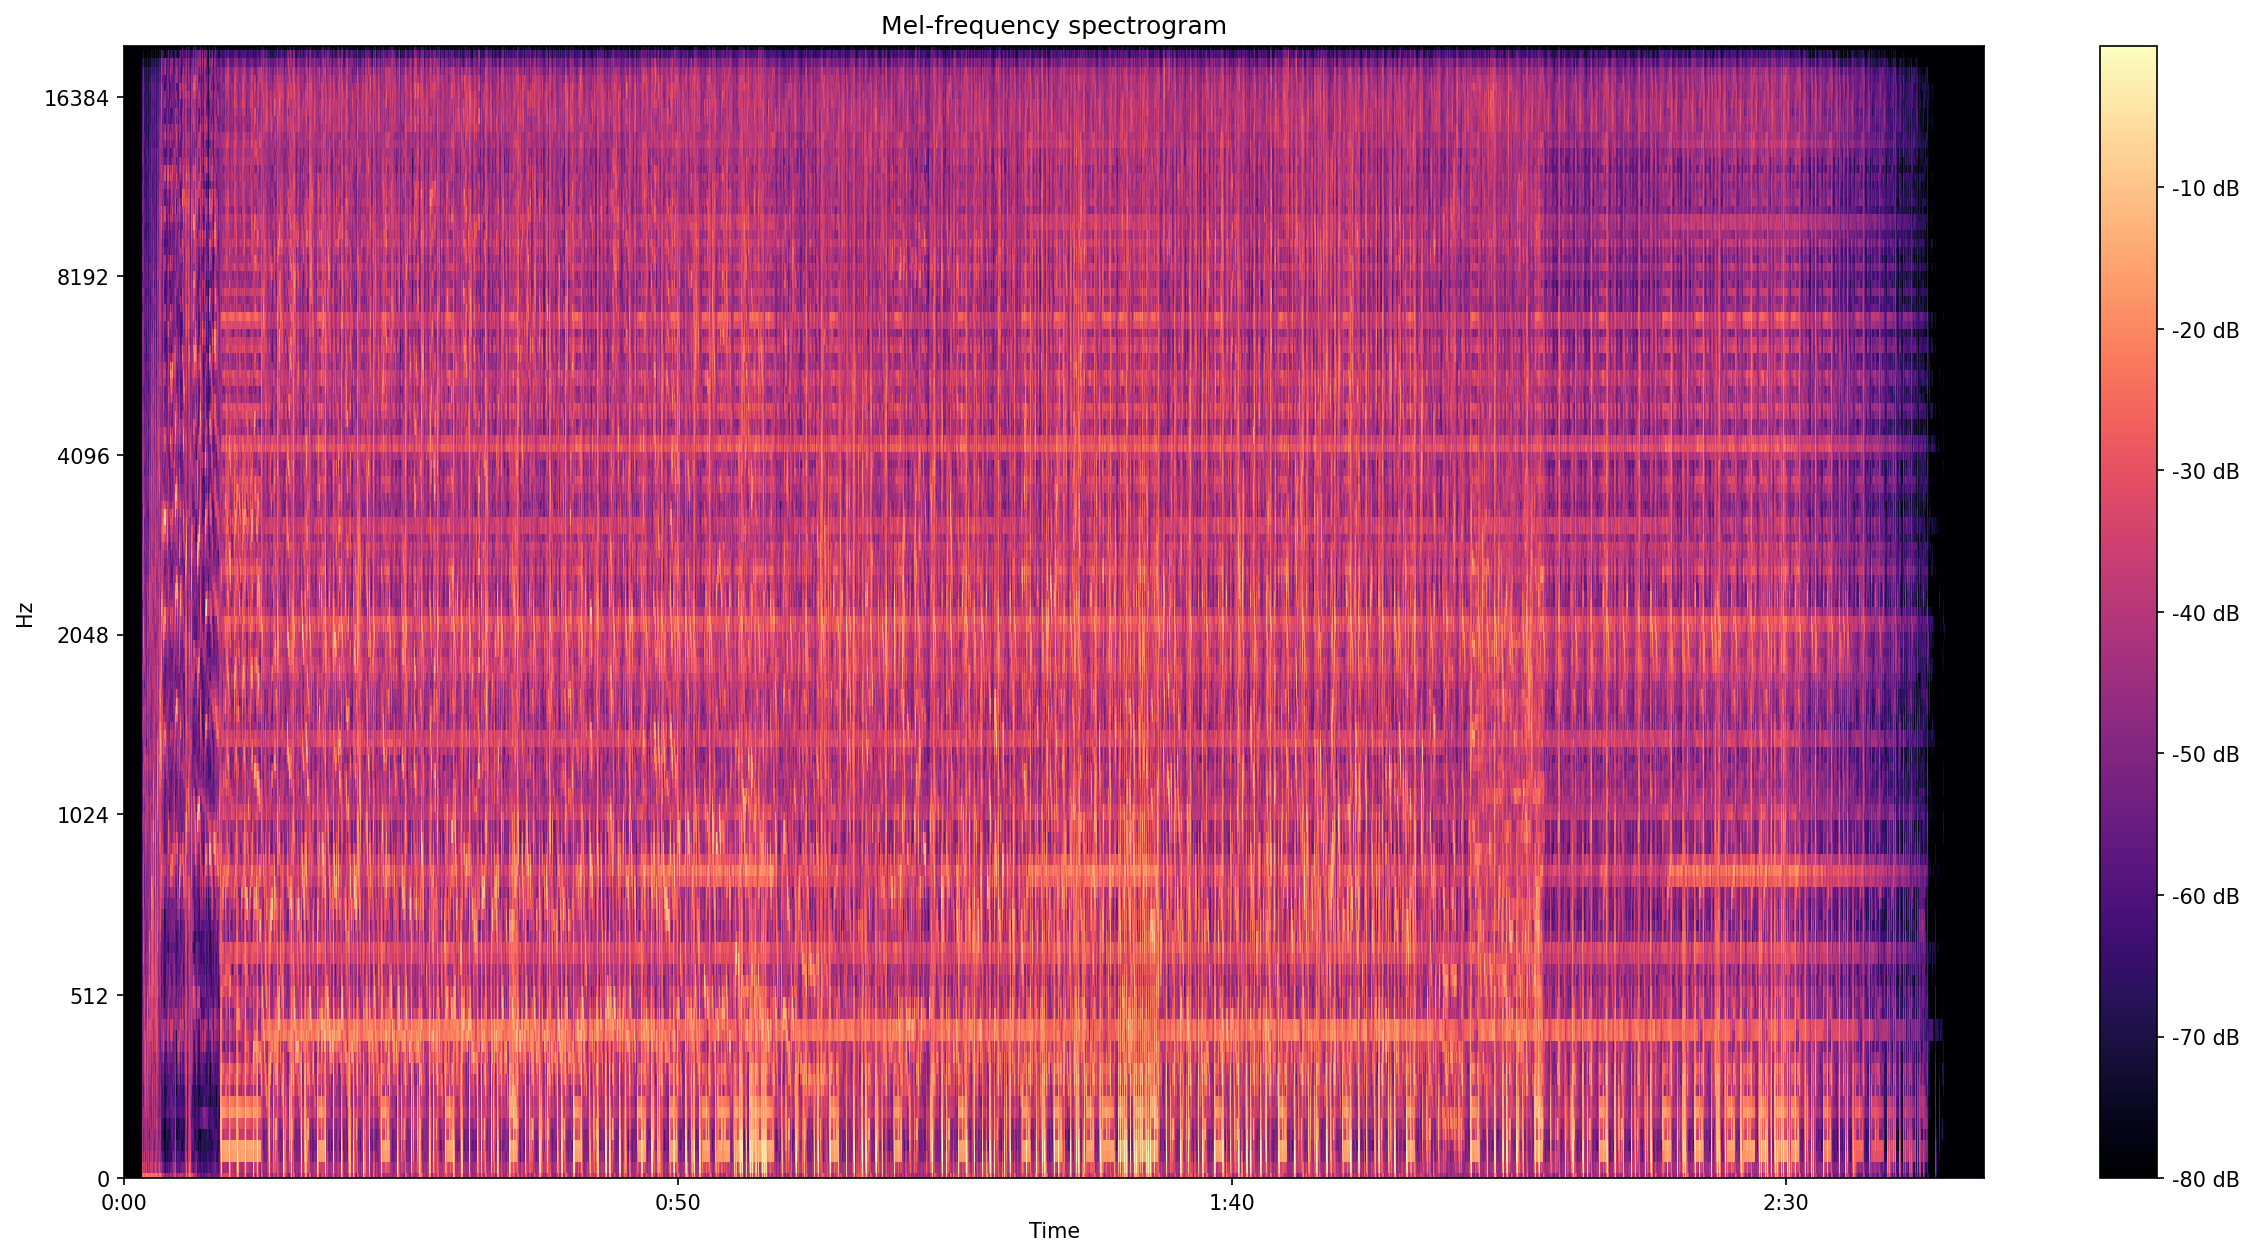

In [45]:
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(mel_data, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=20000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

In [46]:
mel_data.shape

(128, 2623)

In [47]:
y_invertito = librosa.feature.inverse.mel_to_audio(mel_data, n_fft=1024, hop_length=512)

In [48]:
ipd.Audio(y_invertito, rate=sr)

In [44]:
ipd.Audio(y, rate=sr)

In [49]:
mel_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [1]:
tmp = {}
tmp[0] = mel_data

NameError: name 'mel_data' is not defined

In [3]:
df = pd.read_csv('flat_df_no_nulli.csv', index_col=0)

In [4]:
from pydub import AudioSegment

X = [] # np.zeros((len(lst), 128, 454))
indici_elaborati = list()
c = 0

for i in tq.tqdm(range(len(lst))):
    if int(lst[i][-10:].replace(".mp3", "")) not in df.index:
        print(c, " - ", int(lst[i][-10:].replace(".mp3", "")))
        c = c+1
        continue
    
    try:
        sound = AudioSegment.from_mp3(lst[i])
        entryWAV = lst[i].replace(".mp3", ".wav")
        sound.export(entryWAV, format="wav", parameters=["-ar", "8000", "-ac", "1"])

        y, sr = librosa.load(entryWAV, sr=8000, mono=True, duration=29)
        os.remove(entryWAV)
        X.append(librosa.feature.melspectrogram(y=y, sr=sr, n_fft=1024, hop_length=512, n_mels= 128))
        indici_elaborati.append(int(entryWAV[-10:].replace(".wav", "")))
    except:
        print("e")
        pass

0  -  614
e
1  -  1880
2  -  1881
e
e
3  -  3345
4  -  3346
5  -  3347
6  -  3348
7  -  3349
8  -  3350
9  -  3481
10  -  3482
11  -  3483
12  -  3484
13  -  3485
14  -  3486
15  -  3487
16  -  3847
17  -  3848
18  -  3849
19  -  3850
20  -  3851
21  -  3852
22  -  3853
23  -  4533
e
24  -  7046
25  -  7047
26  -  7048
27  -  7049
28  -  7050
29  -  7051
30  -  7052
31  -  7832
e
32  -  9156
33  -  9209
34  -  9660
35  -  9661
36  -  9667
37  -  9889
38  -  9900
39  -  9901
40  -  9903
e
41  -  10399
42  -  10401
43  -  10403
44  -  10404
45  -  10421
46  -  10423
47  -  10424
48  -  10425
49  -  10429
50  -  10461
51  -  10501
52  -  10503
53  -  10504
54  -  10505
55  -  10506
56  -  10507
57  -  10508
58  -  10509
59  -  10510
60  -  10511
61  -  10512
62  -  10513
63  -  10515
64  -  10516
65  -  10517
66  -  10518
67  -  10519
68  -  10550
69  -  10561
70  -  10562
71  -  10563
72  -  10564
73  -  10565
74  -  10569
75  -  10570
76  -  10571
77  -  10572
78  -  10573
79  -  10574


592  -  77212
593  -  77789
594  -  78289
595  -  79278
596  -  79709
597  -  79744
598  -  79854
599  -  79856
600  -  80021
601  -  80132
602  -  80206
e
e
603  -  80893
604  -  82438
605  -  82439
606  -  82641
e
607  -  82820
608  -  83281
609  -  84043
610  -  84151
611  -  84295
612  -  84382
e
e
e
e
613  -  84574
614  -  85292
615  -  85458
616  -  85602
617  -  85914
618  -  86420
619  -  86461
e
e
e
e
620  -  86677
621  -  86901
e
622  -  87109
623  -  87368
624  -  87518
625  -  87607
626  -  87842
627  -  89268
628  -  89886
629  -  89887
630  -  89890
e
e
e
e
e
e
e
e
e
e
631  -  91356
632  -  91798
633  -  91931
634  -  91946
635  -  91947
636  -  91948
637  -  91949
638  -  91950
639  -  91951
640  -  92428
e
641  -  92866
642  -  93351
643  -  93435
644  -  93855
645  -  93929
e
e
e
646  -  95277
647  -  95278
648  -  95524
e
e
e
649  -  96967
650  -  97023
651  -  97223
652  -  97358
653  -  97560
654  -  97591
e
655  -  98463
e
e
e
e
e
e
656  -  99272



In [13]:
for i in X:
    print(i.shape)

(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)

(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 383)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 407)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 449)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 343)
(128, 454)
(128, 454)
(128, 269)
(128, 286)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 376)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)

(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 95)
(128, 108)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)


(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 105)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 432)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)

(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 314)
(128, 454)
(128, 454)
(128, 314)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)

(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)

(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 391)
(128, 454)
(128, 454)
(128, 454)

(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)

(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)

(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 330)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 366)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)

(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 389)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 418)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)

(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 228)
(128, 454)
(128, 454)
(128, 454)
(128, 112)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)

(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)

(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)

(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)

(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)

(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)

(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)
(128, 454)

In [21]:
X2 = np.zeros((len(indici_elaborati), 128, 454))
indici_elaborati2 = []

i = 0

for x in tq.tqdm(X):
    if x.shape == (128, 454):
        X2[i] = x
        indici_elaborati2.append(indici_elaborati[i])
    i = i +1

In [20]:
X2 = None
indici_elaborati2 = None

In [22]:
np.save("eliminami.np", X2)

In [23]:
X = X2
indici_elaborati = indici_elaborati2

<AxesSubplot:>

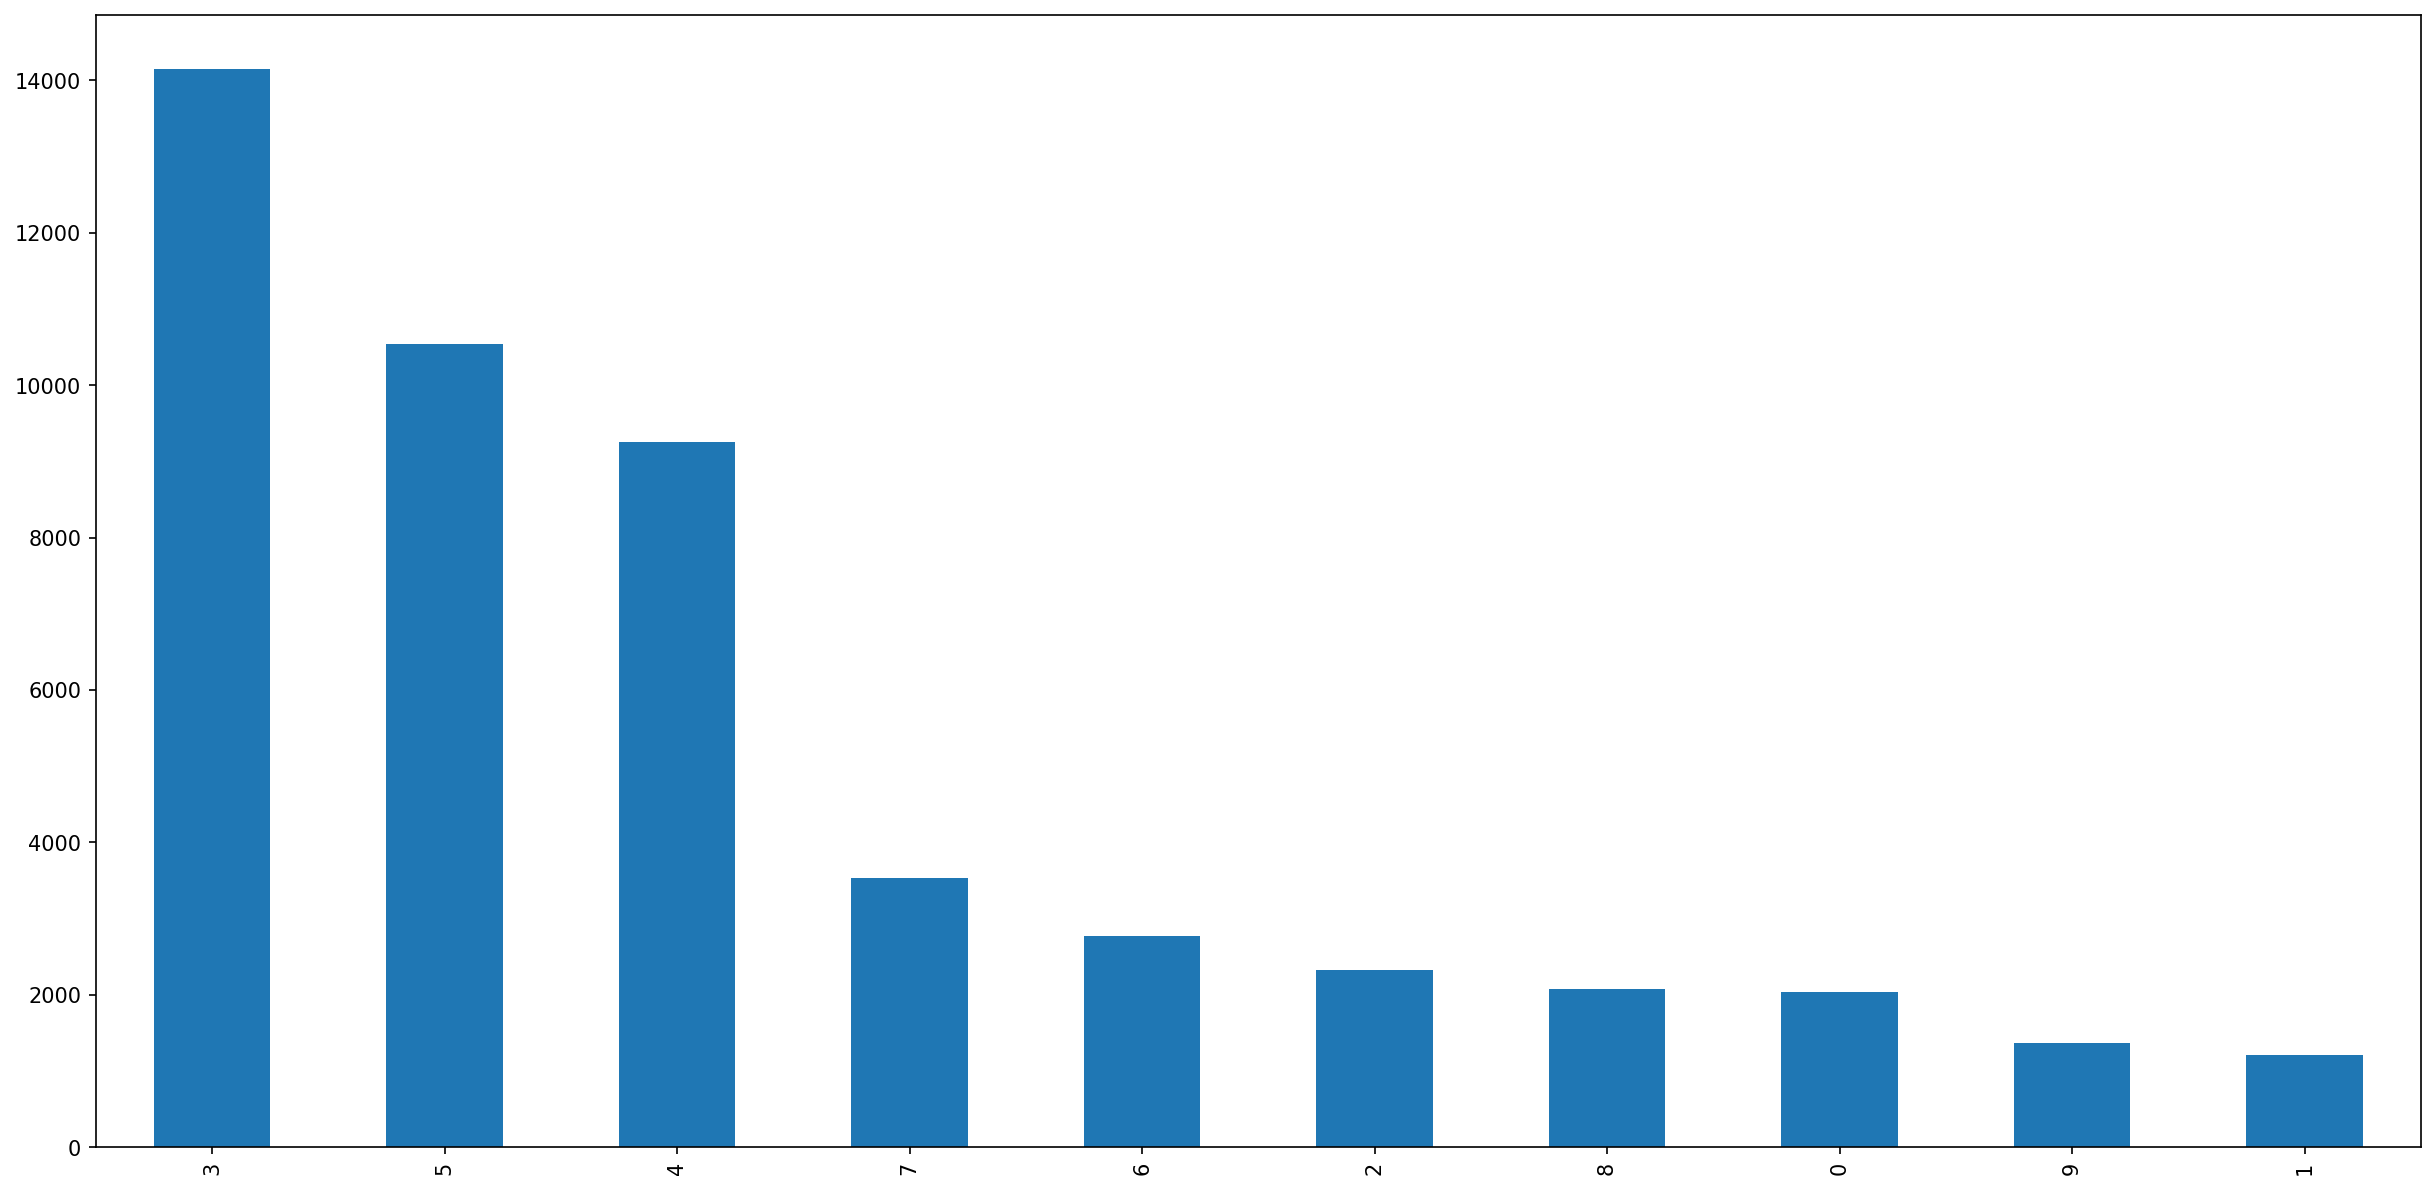

In [24]:
from sklearn.preprocessing import LabelEncoder

label_encoders = dict()
column2encode = ['ALBUM_type_']

for col in column2encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    
df = df[df.TRACK_genre_top.isna() == False] #droppo i nulli

label_encoders = dict()
column2encode = ['TRACK_genre_top']

for col in column2encode:
    le = LabelEncoder()
    df['TRACK_genre_top_num'] = le.fit_transform(df[col])
    label_encoders[col] = le
    
df['TRACK_genre_top_num']=[0 if genre == 3 else genre for genre in df['TRACK_genre_top_num']]
df['TRACK_genre_top_num']=[0 if genre == 0 else genre for genre in df['TRACK_genre_top_num']]
df['TRACK_genre_top_num']=[0 if genre == 14 else genre for genre in df['TRACK_genre_top_num']]
df['TRACK_genre_top_num']=[0 if genre == 2 else genre for genre in df['TRACK_genre_top_num']]



df['TRACK_genre_top_num']=[0 if genre == 15 else genre for genre in df['TRACK_genre_top_num']]
df['TRACK_genre_top_num']=[0 if genre == 11 else genre for genre in df['TRACK_genre_top_num']]
df['TRACK_genre_top_num']=[0 if genre == 10 else genre for genre in df['TRACK_genre_top_num']]


df['TRACK_genre_top_num']=[3 if genre == 13 else genre for genre in df['TRACK_genre_top_num']] #rock 13 --> 3
df['TRACK_genre_top_num']=[2 if genre == 12 else genre for genre in df['TRACK_genre_top_num']] #pop 12 --> 2

df.TRACK_genre_top_num.value_counts().plot(kind='bar')

In [42]:
df_ = df[df.index.isin(indici_elaborati)]
df_

ALBUM_date_released_year  ALBUM_favorites ALBUM_type ALBUM_tags  \
track_id                                                                    
2                           2009.0              4.0      Album         []   
3                           2009.0              4.0      Album         []   
5                           2009.0              4.0      Album         []   
10                          2008.0              4.0      Album         []   
134                         2009.0              4.0      Album         []   
...                            ...              ...        ...        ...   
99982                       2014.0              5.0      Album         []   
99983                       2014.0              5.0      Album         []   
99991                       2014.0              5.0      Album         []   
99993                       2014.0              5.0      Album         []   
99994                       2014.0              5.0      Album         []   

          ALBUM_tracks  ALBUM_listens                     ALBUM_title  \
track_id                                                                
2                  7.0         6073.0            AWOL - A Way Of Life   
3                  7.0         6073.0            AWOL - A Way Of Life   
5                  7.0         6073.0            AWOL - A Way Of Life   
10                 2.0        47632.0               Constant Hitmaker   
134                7.0         6073.0            AWOL - A Way Of Life   
...                ...            ...                             ...   
99982            652.0        58483.0  Classwar Karaoke - 0025 Survey   
99983            652.0        58483.0  Classwar Karaoke - 0025 Survey   
99991            652.0        58483.0  Classwar Karaoke - 0025 Survey   
99993            652.0        58483.0  Classwar Karaoke - 0025 Survey   
99994            652.0        58483.0  Classwar Karaoke - 0025 Survey   

         SET_subset  ARTIST_favorites ARTIST_location  ...  \
track_id                                               ...   
2             small          2.302585      New Jersey  ...   
3            medium          2.302585      New Jersey  ...   
5             small          2.302585      New Jersey  ...   
10            small          4.317488             NaN  ...   
134          medium          2.302585      New Jersey  ...   
...             ...               ...             ...  ...   
99982         large          1.609438             NaN  ...   
99983         large          0.693147             NaN  ...   
99991         large          0.000000           Paris  ...   
99993         large          0.693147             NaN  ...   
99994         large          0.693147             NaN  ...   

         spectral_contraststd tonnetzkurtosis  tonnetzmax  tonnetzmean  \
track_id                                                                 
2                    0.746760        1.335255   -0.069000     0.063224   
3                    1.221668        0.087193   -0.092808    -0.029543   
5                    1.546327        3.707580   -0.159586     0.005594   
10                   1.987875        1.841458   -0.089548    -0.084626   
134                  2.088149        6.580380   -0.146649    -0.041780   
...                       ...             ...         ...          ...   
99982                1.090123       -0.179772    0.121879     0.066890   
99983               -0.268068       -0.913345   -0.266917    -0.005675   
99991               -0.300564       -2.124855   -0.055971     0.036265   
99993               -0.035063       -1.022259    0.149647     0.038160   
99994                4.323867       -0.822056    0.218452     0.047493   

         tonnetzmedian tonnetzmin tonnetzskew  tonnetzstd  ARTIST_location_  \
track_id                                                                      
2            -0.055764   0.206749   -0.152102   -0.075675     North America   
3             0.014404   0.106603   -0.251621   -0.

In [56]:
X2 = np.zeros((len(df_.index), 128, 454))
indici_elaborati2 = []

i = 0
j=0

for indice in tq.tqdm(indici_elaborati):
    if indice in df_.index:
        indici_elaborati2.append(indice)
        X2[j] = X[i]
        j = j +1
    i = i+1

In [60]:
#32971
#:27000
# 27000:30000
# 30000:

In [63]:
df_.values

array([7, 7, 7, ..., 5, 5, 5], dtype=int64)

# KERAS

In [64]:
import tensorflow as tf
from sklearn.model_selection import train_test_split, cross_val_score


y = df_.values

X_train = X[:27000]
y_train = y[:27000]

X_test = X[27000:30000]
y_test = y[27000:30000]

X_val = X[30000:]
y_val = y[30000:]

X_train = np.array([x.reshape( (X.shape[1], X.shape[2], 1) ) for x in X_train])
X_val = np.array([x.reshape( (X.shape[1], X.shape[2], 1) ) for x in X_val])
X_test = np.array([x.reshape( (X.shape[1], X.shape[2], 1) ) for x in X_test])

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [65]:
X.shape

(32971, 128, 454)

In [82]:
from keras.layers import Activation, Dense, Dropout, Conv2D, Flatten, MaxPooling2D
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping

model = Sequential()
input_shape=(128, 454, 1)

model.add(Conv2D(24, (5, 5), strides=(1, 1), input_shape=input_shape))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dropout(rate=0.5))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

In [83]:
model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=['accuracy'])


mc = ModelCheckpoint('best_model_cnn.h5', monitor='val_loss', save_best_only=True)
es = EarlyStopping(monitor='val_loss', patience=10)

callbacks = [mc, es]


model.fit(x=X_train, y=y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_val, y_val), callbacks=callbacks
         )

score = model.evaluate(x=X_test, y=y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/1000
211/211 [==============================] - 33s 147ms/step - loss: 2.9046 - accuracy: 0.2928 - val_loss: 1.9283 - val_accuracy: 0.2457
Epoch 2/1000
211/211 [==============================] - 25s 118ms/step - loss: 1.9301 - accuracy: 0.3243 - val_loss: 1.9227 - val_accuracy: 0.2440
Epoch 3/1000
211/211 [==============================] - 24s 115ms/step - loss: 1.9365 - accuracy: 0.3194 - val_loss: 1.9278 - val_accuracy: 0.2457
Epoch 4/1000
211/211 [==============================] - 24s 114ms/step - loss: 1.9154 - accuracy: 0.3254 - val_loss: 1.9287 - val_accuracy: 0.2457
Epoch 5/1000
211/211 [==============================] - 25s 118ms/step - loss: 1.9315 - accuracy: 0.3177 - val_loss: 1.9346 - val_accuracy: 0.2457
Epoch 6/1000
211/211 [==============================] - 24s 116ms/step - loss: 1.9201 - accuracy: 0.3220 - val_loss: 1.9241 - val_accuracy: 0.2471
Epoch 7/1000
211/211 [==============================] - 27s 127ms/step - loss: 1.9114 - accuracy: 0.3284 - val_loss: 1

KeyboardInterrupt: 

In [68]:
np.save("X_mel_protno.np", X)

In [71]:
X = None
X2 = None
df_ = None
df__ = None
lst = None
indici_elaborati = None
indici_elaborati2 = None

tmp = None

In [69]:
X.shape

(32971, 128, 454)

In [70]:
y.shape

(32971,)

In [73]:
np.save("y_mel_protno.np", y)

In [81]:
y = None